In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from scipy.stats import zscore

In [ ]:
# Data
df = pd.read_csv('Pokemon.csv')

# EDA

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [7]:
df.shape

(800, 12)

In [8]:
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [10]:
unique_name = df['Name'].unique()

In [11]:
df['Name'].value_counts()

Name
Bulbasaur              1
Uxie                   1
GalladeMega Gallade    1
Probopass              1
Dusknoir               1
                      ..
Lugia                  1
Ho-oh                  1
Celebi                 1
Treecko                1
Volcanion              1
Name: count, Length: 800, dtype: int64

### Type 1

In [12]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [13]:
df['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

<Axes: ylabel='Type 1'>

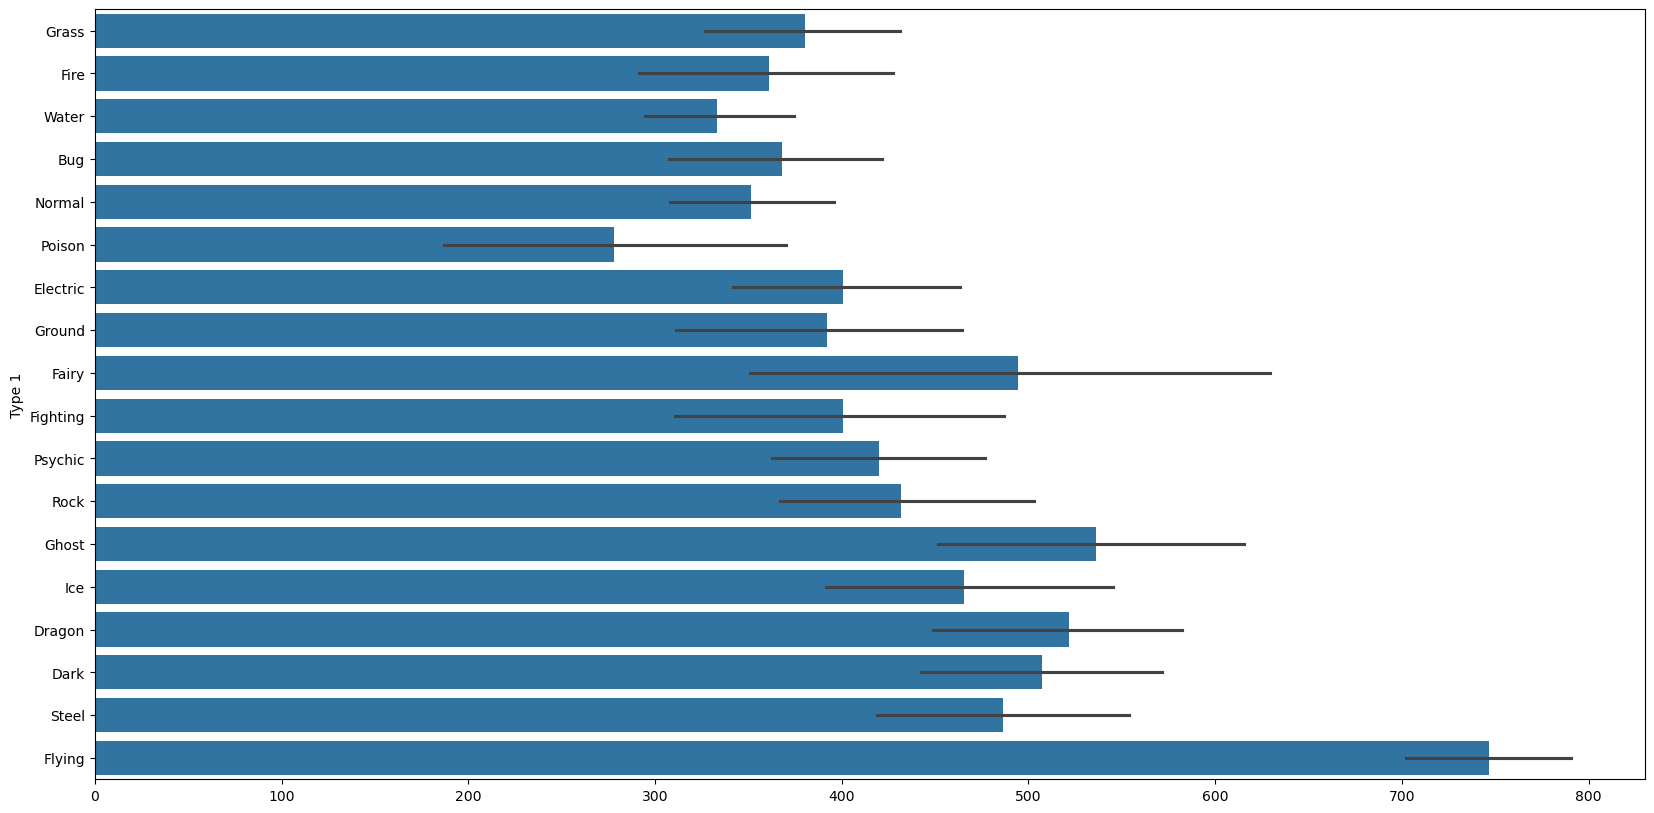

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(df['Type 1'])

### Type 2

In [15]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [16]:
df['Type 2'].value_counts()

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

<Axes: ylabel='Type 2'>

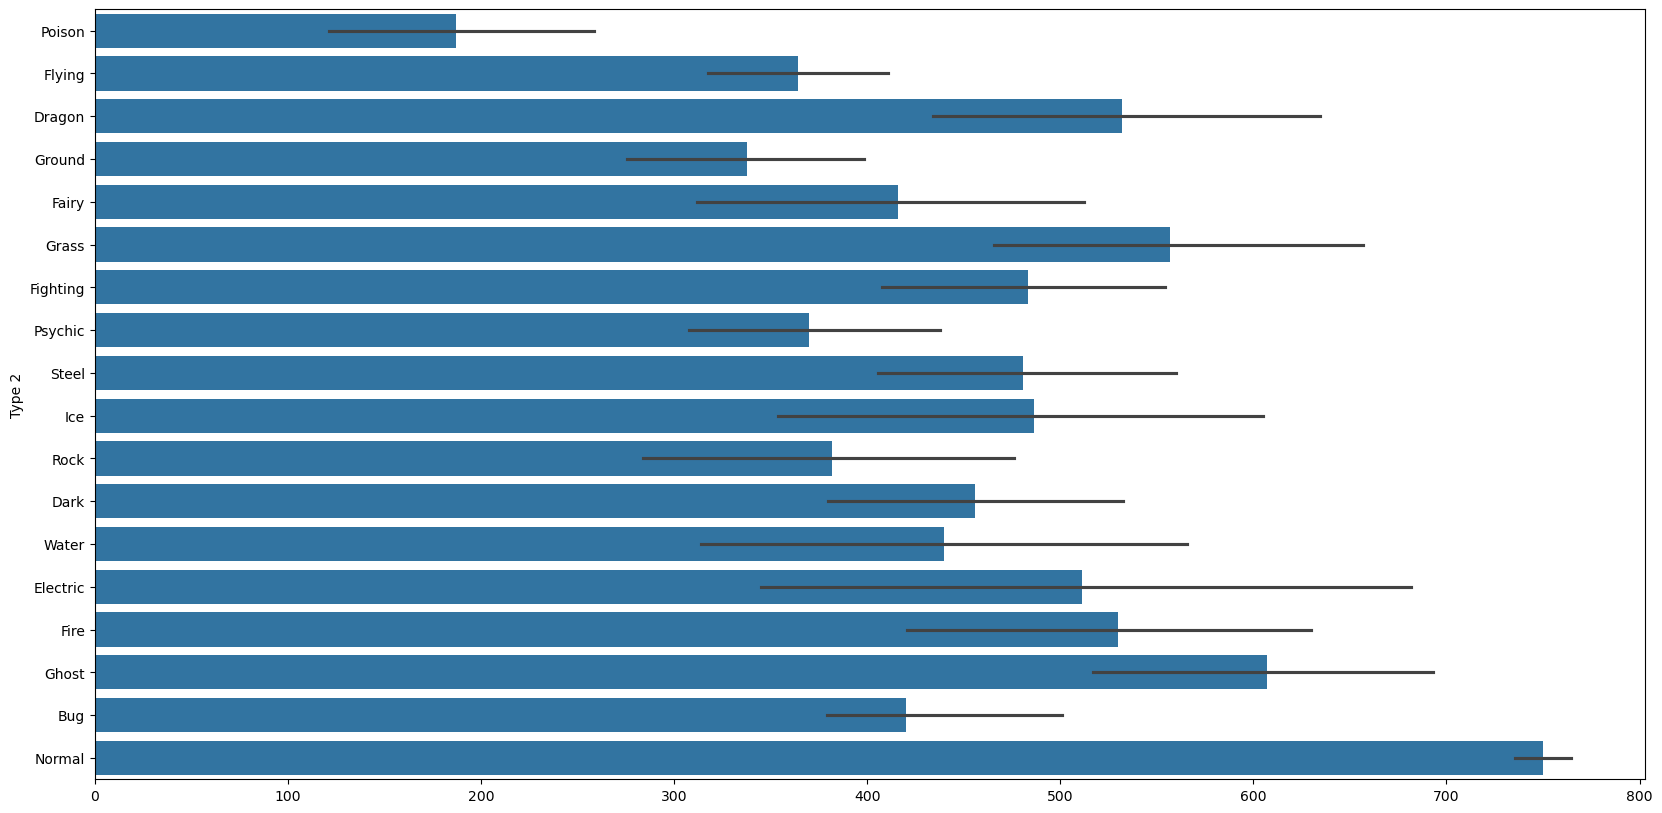

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(df['Type 2'])

### HP

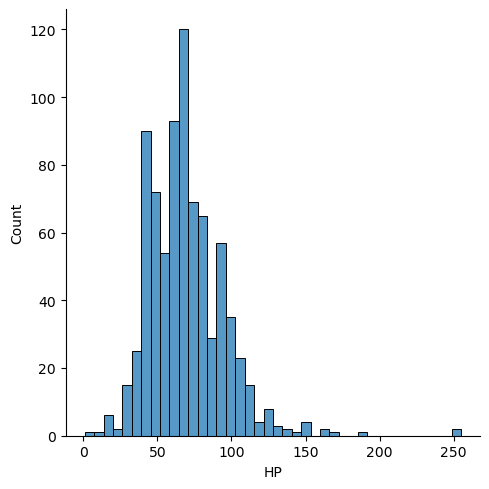

In [18]:
sns.displot(df['HP'])

/var/folders/3w/g76x3rkx2wbg5pzd1y_6wg000000gn/T/ipykernel_26758/3571093746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HP'])


<Axes: xlabel='HP', ylabel='Density'>

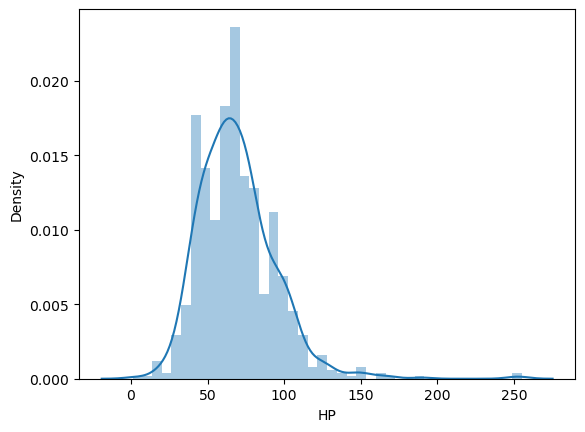

In [19]:
sns.distplot(df['HP'])

### Attack and Defence

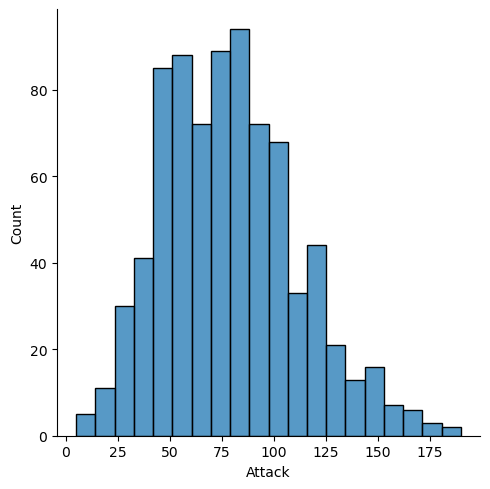

In [20]:
# Attack
sns.displot(df['Attack'])

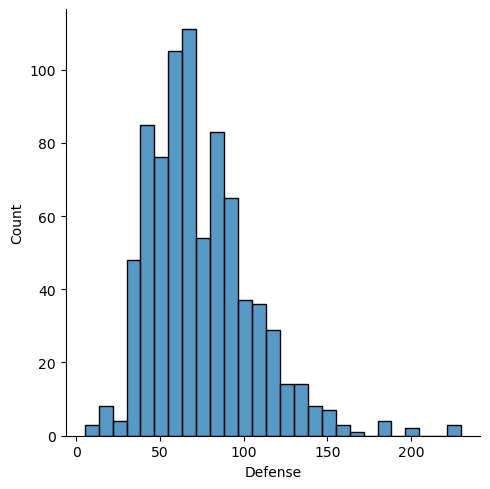

In [21]:
# Defense
sns.displot(df['Defense'])

### Special Attack and Defense

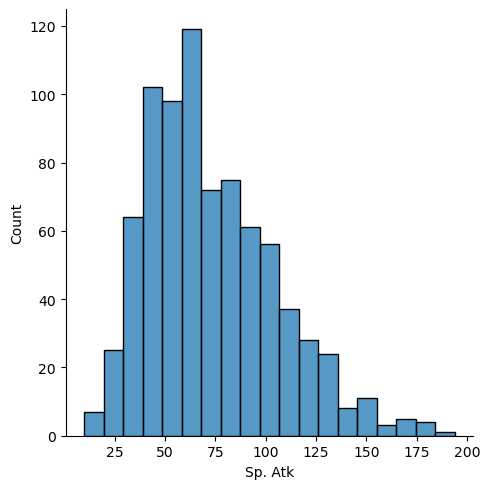

In [22]:
# Sp Attack
sns.displot(df['Sp. Atk'])

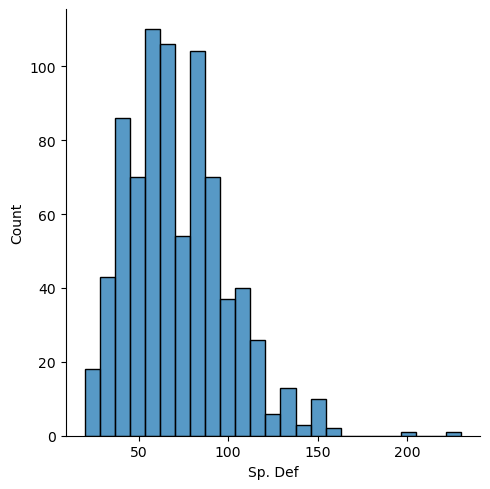

In [23]:
# Sp Defense
sns.displot(df['Sp. Def'])

### Speed

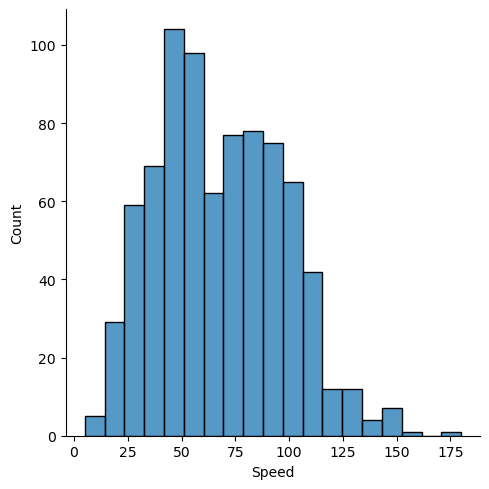

In [24]:
sns.displot(df['Speed'])

### Generation

In [25]:
df['Generation'].unique()

array([1, 2, 3, 4, 5, 6])

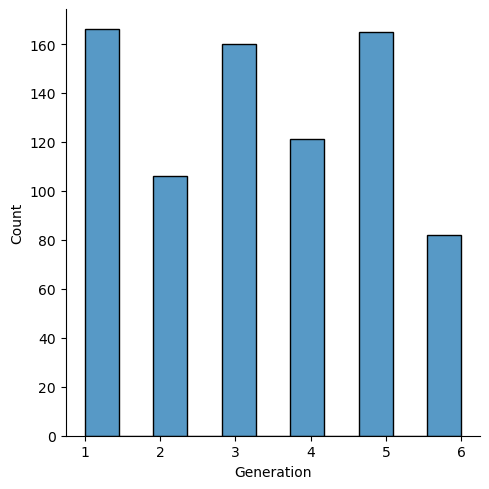

In [26]:
sns.displot(df['Generation'])

### Legendary

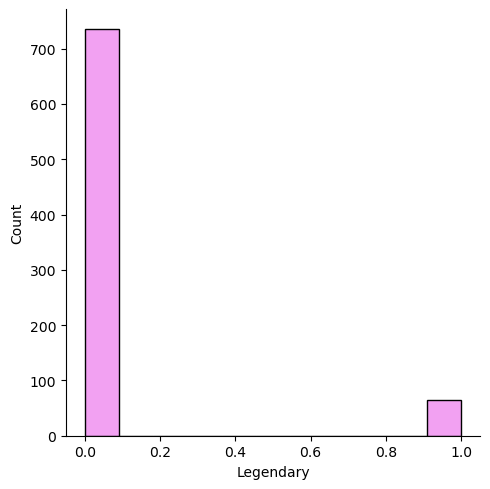

In [27]:
sns.displot(df['Legendary'], color='violet')

Text(0.5, 1.0, 'Legendary Status')

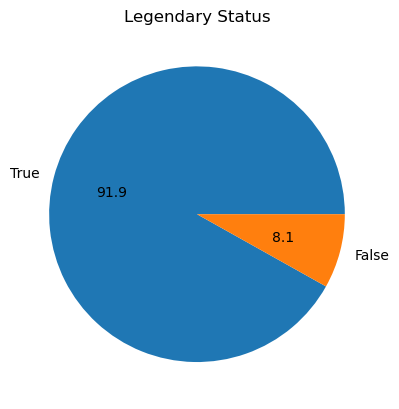

In [28]:
plt.pie(df['Legendary'].value_counts(), autopct='%1.1f', labels=['True', 'False'])
plt.title('Legendary Status')

In [29]:
df.Legendary.value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

# Impact on Legendary Status

<Axes: >

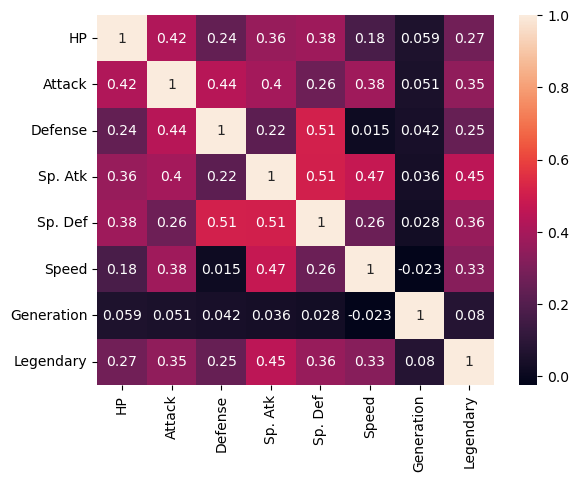

In [30]:
grouped_data_heat = df.drop(columns=['Name','Type 1','Type 2','Total'])
sns.heatmap(grouped_data_heat.corr(), annot=True)

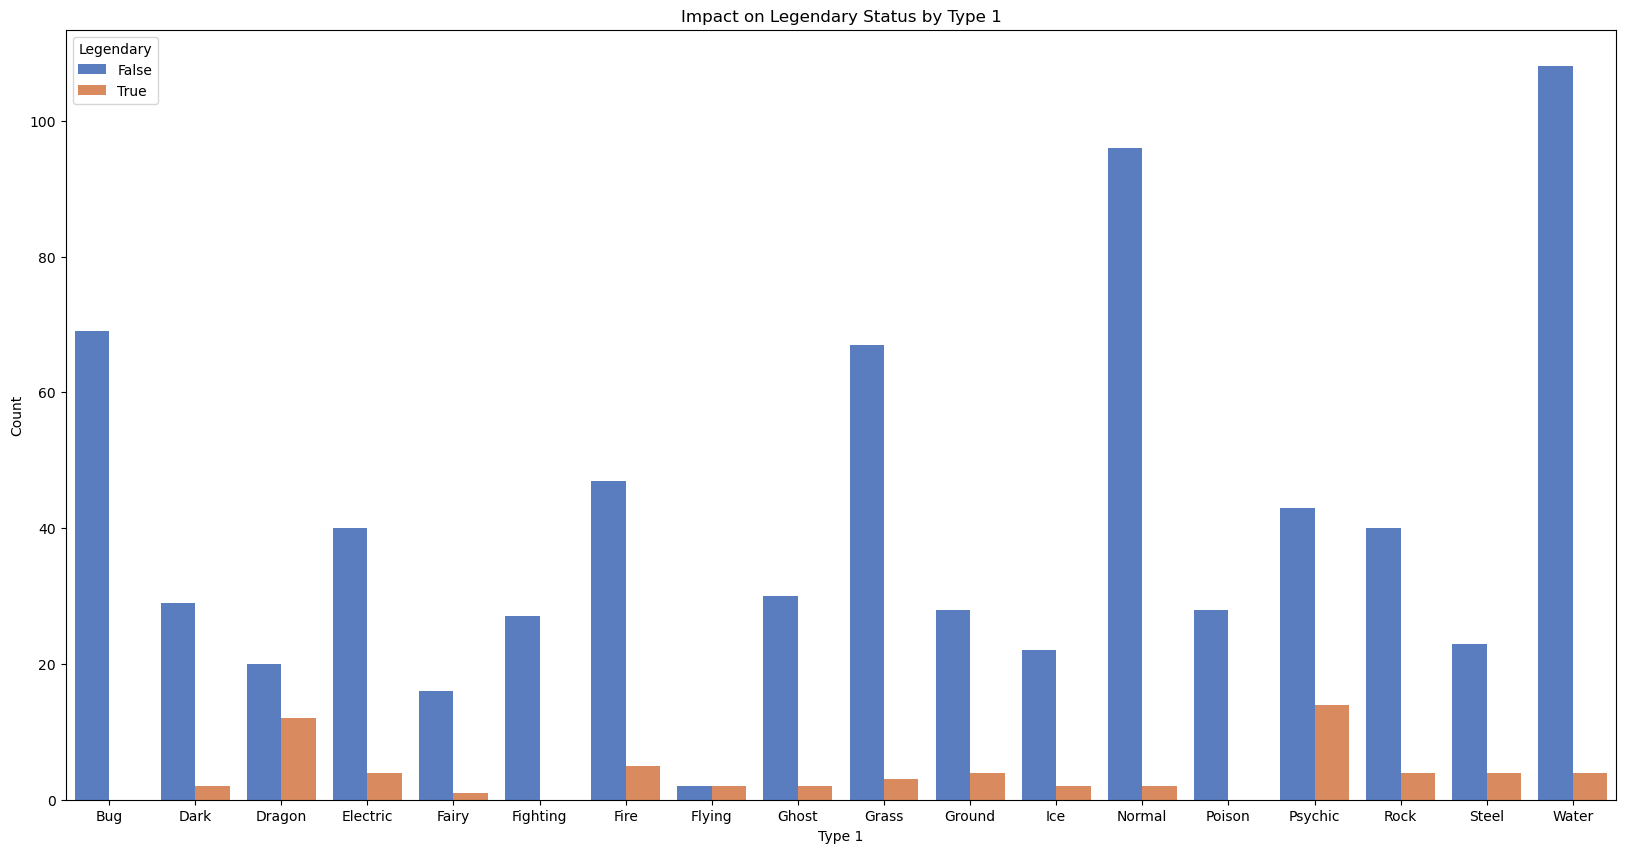

In [31]:
grouped_data = df.groupby(['Type 1', 'Legendary']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=grouped_data, x='Type 1', y='count', hue='Legendary', palette='muted')
plt.title('Impact on Legendary Status by Type 1')
plt.ylabel('Count')
plt.xlabel('Type 1')
plt.show()

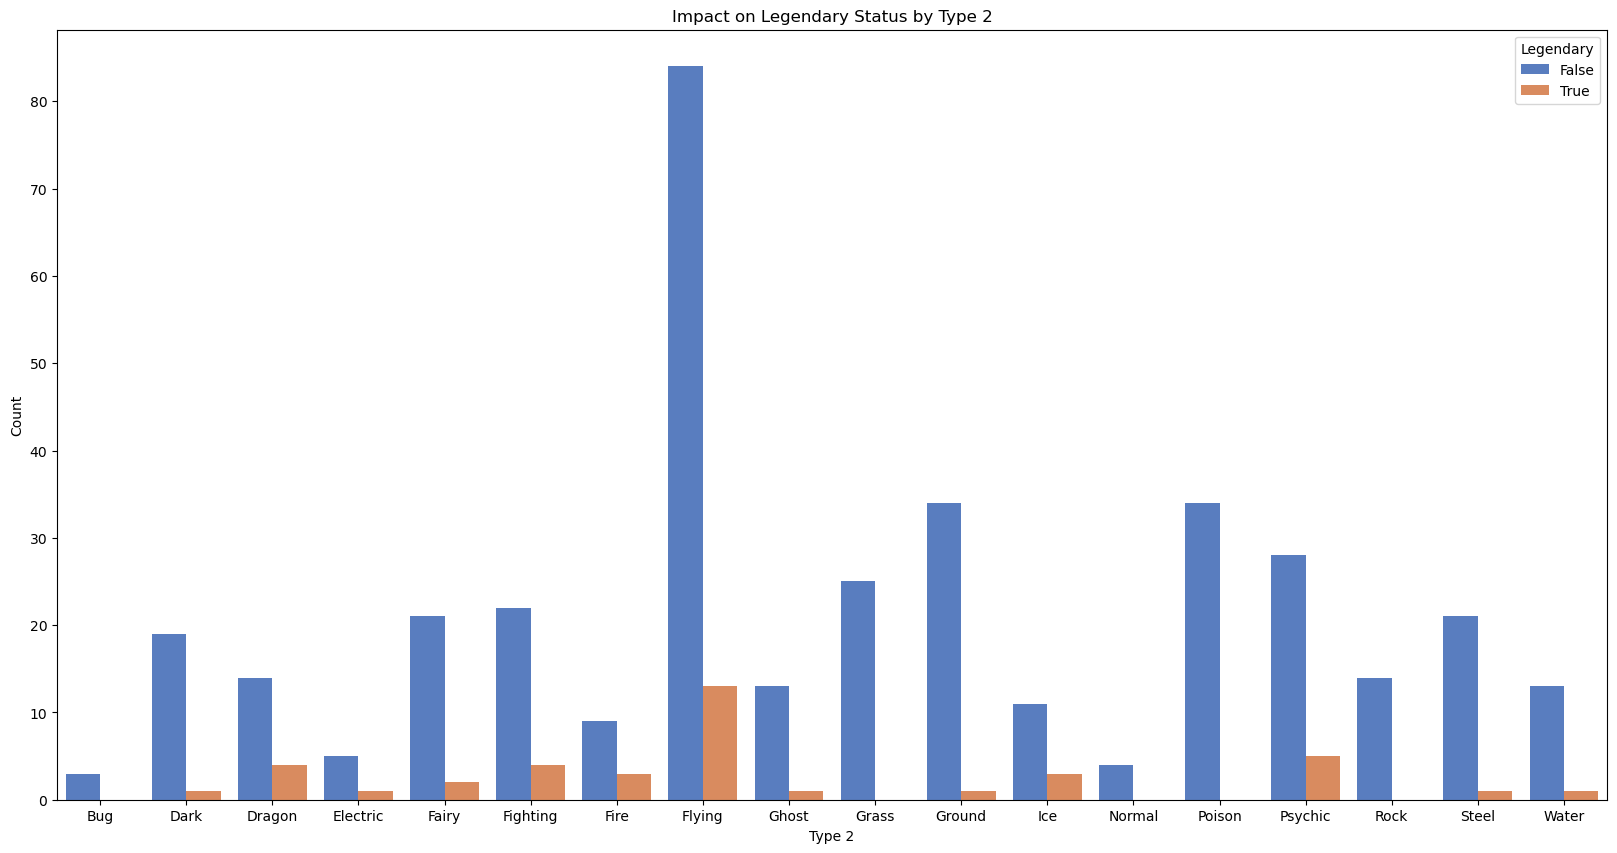

In [32]:
grouped_data = df.groupby(['Type 2', 'Legendary']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=grouped_data, x='Type 2', y='count', hue='Legendary', palette='muted')
plt.title('Impact on Legendary Status by Type 2')
plt.ylabel('Count')
plt.xlabel('Type 2')
plt.show()

# Outlier Detection

Text(0.5, 1.0, 'Generation')

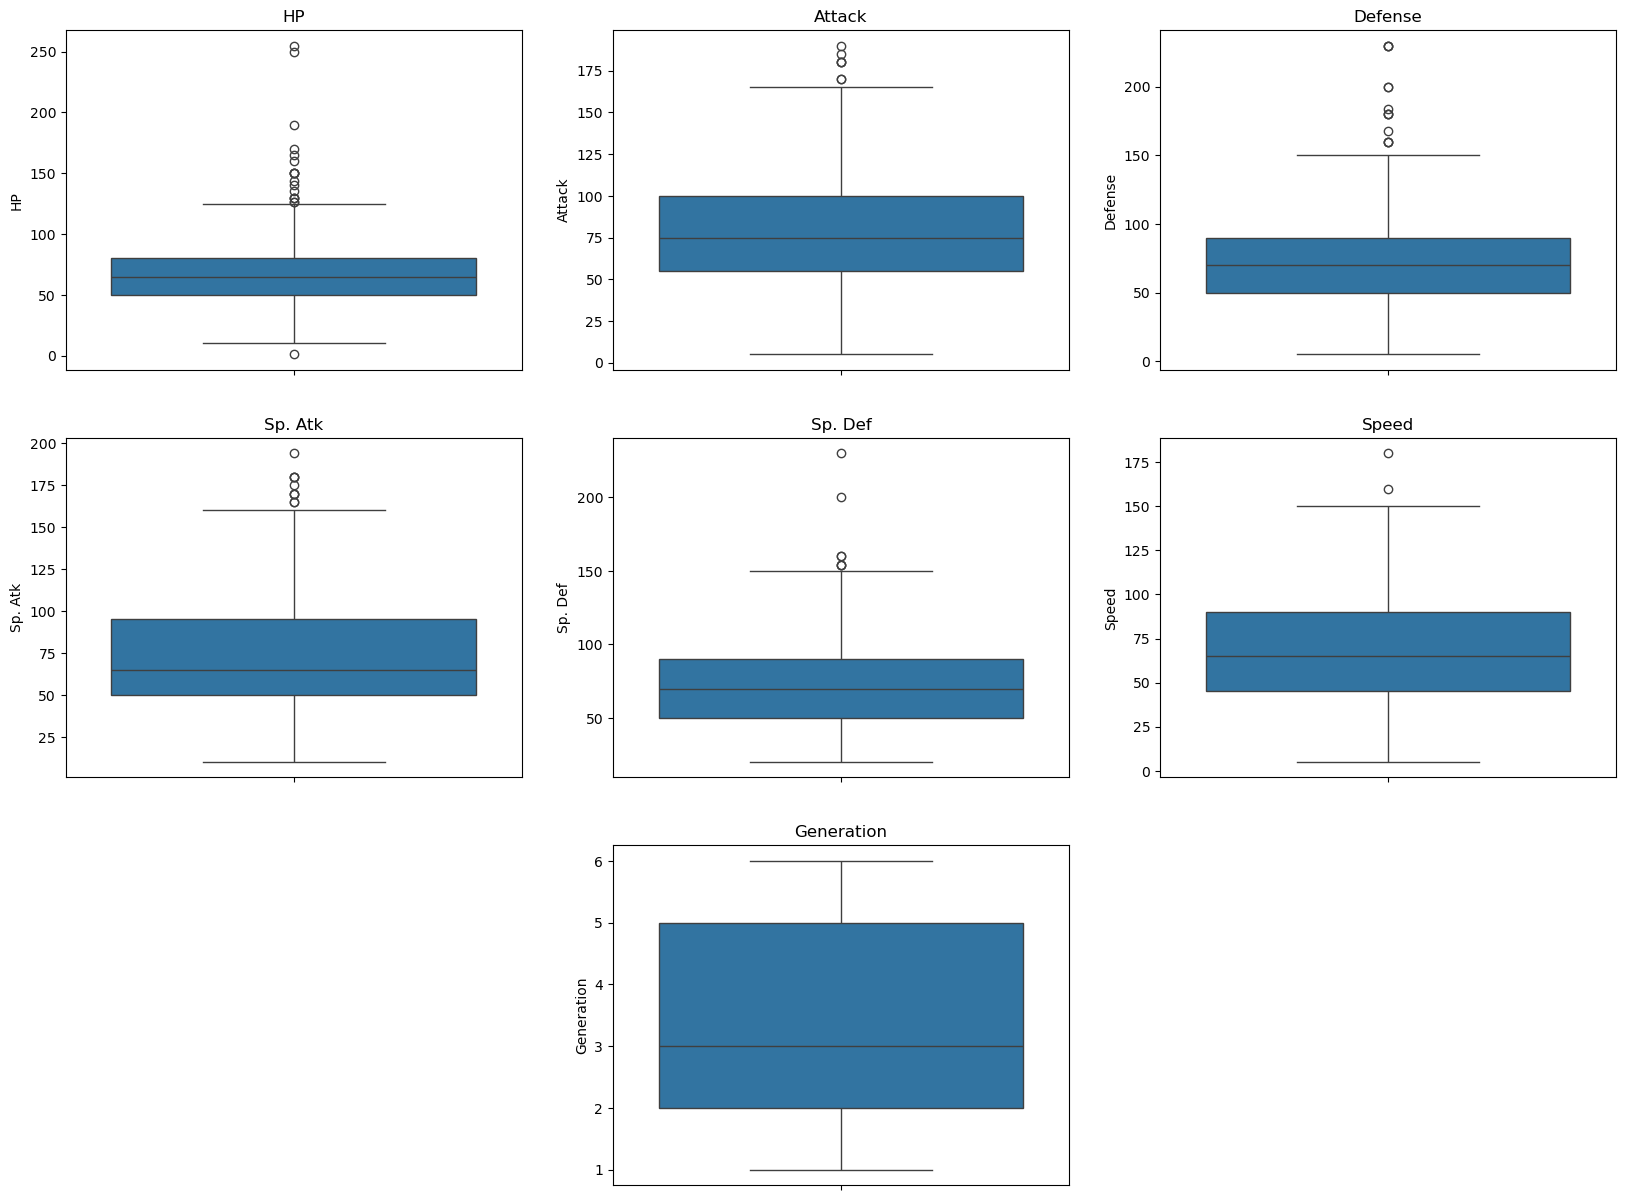

In [33]:
plt.figure(figsize=(20,15))

# HP
plt.subplot(3,3,1)
sns.boxplot(df['HP'])
plt.title('HP')

# Attack
plt.subplot(3,3,2)
sns.boxplot(df['Attack'])
plt.title('Attack')

# Defense
plt.subplot(3,3,3)
sns.boxplot(df['Defense'])
plt.title('Defense')

# Sp. Atk
plt.subplot(3,3,4)
sns.boxplot(df['Sp. Atk'])
plt.title('Sp. Atk')

# Sp. Def
plt.subplot(3,3,5)
sns.boxplot(df['Sp. Def'])
plt.title('Sp. Def')

# Speed
plt.subplot(3,3,6)
sns.boxplot(df['Speed'])
plt.title('Speed')

# Generation
plt.subplot(3,3,8)
sns.boxplot(df['Generation'])
plt.title('Generation')

# Cleaning Data

In [34]:
# Dropping columns with no significant impact
data=df.drop('Type 1',axis=1)
data=df.drop('Type 2',axis=1)

In [35]:
# Replacing Type2[NAN] with last valid value
    # There is no singular Majority value
df=df.fillna(method='pad',axis=1)

/var/folders/3w/g76x3rkx2wbg5pzd1y_6wg000000gn/T/ipykernel_26758/2171178251.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='pad',axis=1)


# Decision Tree Models

### Encoding

In [36]:
labelEncoder =LabelEncoder()

In [37]:
for col in df.columns:
    df[col] = labelEncoder.fit_transform(df[col])

### Training

In [38]:
# Splitting Data
x= df.drop('Legendary', axis=1)
y = df['Legendary']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [40]:
print(x_train.shape)
print(x_test.shape)

(560, 11)
(240, 11)


In [41]:
print(y_train.shape)
print(y_test.shape)

(560,)
(240,)


### DT Classifier Model

In [42]:
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [43]:
y_pred_classifier = classifier.predict(x_test)

In [44]:
y_pred_classifier

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### DT Regression Model

In [45]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [46]:
y_pred_regressor = regressor.predict(x_test)

In [47]:
y_pred_regressor

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Results

### Classifier

In [48]:
print(confusion_matrix(y_pred_classifier, y_test))

[[211   9]
 [  8  12]]


In [49]:
print(accuracy_score(y_pred_classifier, y_test))

0.9291666666666667


### Regressor

In [50]:
print(confusion_matrix(y_pred_regressor, y_test))

[[211   9]
 [  8  12]]


In [51]:
print(accuracy_score(y_pred_regressor, y_test))

0.9291666666666667


In [52]:
mse = mean_squared_error(y_pred_regressor, y_test)
rmse = np.sqrt(mse)

rmse

0.26614532371118854